In [ ]:
# collab setup
!git clone https://github.com/kallioaa/frustration_msc.git
%cd /content/frustration_msc
import sys
from pathlib import Path

sys.path.insert(0, "/content/frustration_msc/src")

from google.colab import drive
drive.mount("/content/drive")

# google drive path 
RESULTS_PATH = Path("/content/drive/MyDrive/sweeps")


In [ ]:
# local setup
import sys
from pathlib import Path

sys.path.append(str(Path.cwd().resolve().parent.parent))

# local path
# google drive path 
RESULTS_PATH = Path("outputs/sweeps/")

In [ ]:
from pathlib import Path
import pickle

from experiments.sweep_plots import plot_sweep_training, plot_sweep_evaluation
from experiments.sweep_plots_helpper import (
    taxi_training_plot_specs,
    taxi_evaluation_plot_specs,
    cliffwalking_training_plot_specs,
    cliffwalking_evaluation_plot_specs,
    frozenlake_training_plot_specs,
    frozenlake_evaluation_plot_specs,
)

In [ ]:
# filtering for runs

from collections.abc import Iterable
from typing import Any


def _agent_kwargs(run: dict[str, Any]) -> dict[str, Any]:
    return run.get("params", {}).get("agent_kwargs", {}) or {}


# Confirmation-bias sweeps
def select_confirmatory_results(
    results: Iterable[dict[str, Any]],
) -> list[dict[str, Any]]:
    return [
        r
        for r in results
        if _agent_kwargs(r).get("alpha_conf", float("-inf"))
        > _agent_kwargs(r).get("alpha_disconf", float("inf"))
    ]


def select_unconfirmatory_results(
    results: Iterable[dict[str, Any]],
) -> list[dict[str, Any]]:
    return [
        r
        for r in results
        if _agent_kwargs(r).get("alpha_conf", float("inf"))
        < _agent_kwargs(r).get("alpha_disconf", float("-inf"))
    ]


def select_confirmation_baseline_results(
    results: Iterable[dict[str, Any]],
) -> list[dict[str, Any]]:
    # baseline: alpha_conf == alpha_disconf
    return [
        r
        for r in results
        if _agent_kwargs(r).get("alpha_conf") == _agent_kwargs(r).get("alpha_disconf")
    ]


# Positivity-bias sweeps
def select_positivity_biased_results(
    results: Iterable[dict[str, Any]],
) -> list[dict[str, Any]]:
    return [
        r
        for r in results
        if _agent_kwargs(r).get("alpha_positive", float("-inf"))
        > _agent_kwargs(r).get("alpha_negative", float("inf"))
    ]


def select_negativity_biased_results(
    results: Iterable[dict[str, Any]],
) -> list[dict[str, Any]]:
    return [
        r
        for r in results
        if _agent_kwargs(r).get("alpha_positive", float("inf"))
        < _agent_kwargs(r).get("alpha_negative", float("-inf"))
    ]


def select_positivity_baseline_results(
    results: Iterable[dict[str, Any]],
) -> list[dict[str, Any]]:
    # baseline: alpha_positive == alpha_negative
    return [
        r
        for r in results
        if _agent_kwargs(r).get("alpha_positive")
        == _agent_kwargs(r).get("alpha_negative")
    ]

# Results

## Taxi V3

In [ ]:
# Taxi - confirmation bias
file_taxi_conf = RESULTS_PATH / "taxi_final_results" / "taxi_conf_all_pairs.pkl"
with file_taxi_conf.open("rb") as f:
    conf_results = pickle.load(f)
print(f"Loaded {len(conf_results)} runs from {file_taxi_conf}")

In [ ]:
plot_sweep_training(
    file_taxi_conf,
    window_size=500,
    start_episode=0,
    plot_specs=taxi_training_plot_specs(),
)

In [ ]:
plot_sweep_evaluation(results, window_size=300, plot_specs=taxi_evaluation_plot_specs())

In [ ]:
# download data for plots
# Taxi - positivity bias
file_taxi_pos = RESULTS_PATH / "taxi_final_results" / "taxi_pos_all_ratios.pkl"
with file_taxi_pos.open("rb") as f:
    pos_results = pickle.load(f)
print(f"Loaded {len(pos_results)} runs from {file_taxi_pos}")

## Cliff Walking

In [ ]:
# CliffWalking  x confirmation bias
file_cliffwalking_conf = RESULTS_PATH / "cliffwalking_final_results" / "cliffwalking_conf_all_pairs.pkl"
with file_cliffwalking_conf.open("rb") as f:
    conf_results = pickle.load(f)
print(f"Loaded {len(conf_results)} runs from {file_cliffwalking_conf}")

Loaded 165 runs from outputs/sweeps/cliffwalking_final_results/cliffwalking_conf_all_pairs.pkl


In [ ]:
conf_conf_results = select_confirmatory_results(conf_results) + select_confirmation_baseline_results(conf_results)
conf_disconf_results = select_unconfirmatory_results(conf_results) + select_confirmation_baseline_results(conf_results)

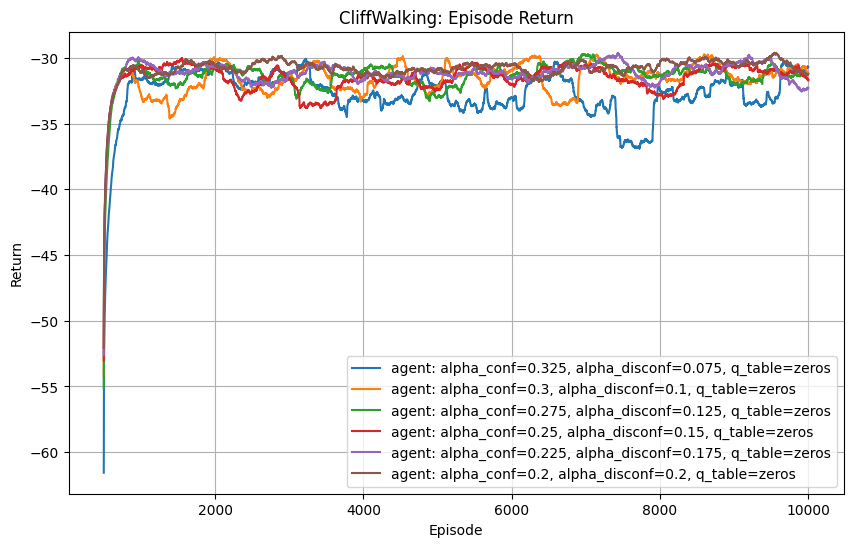

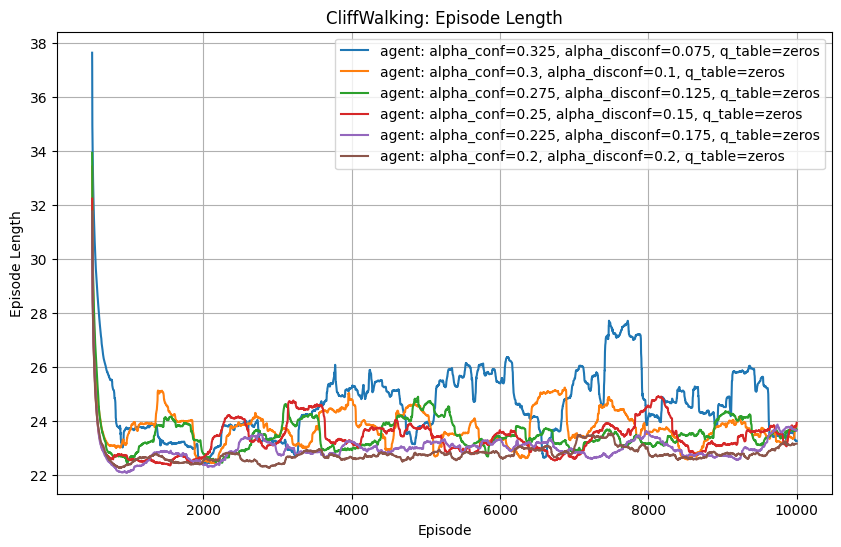

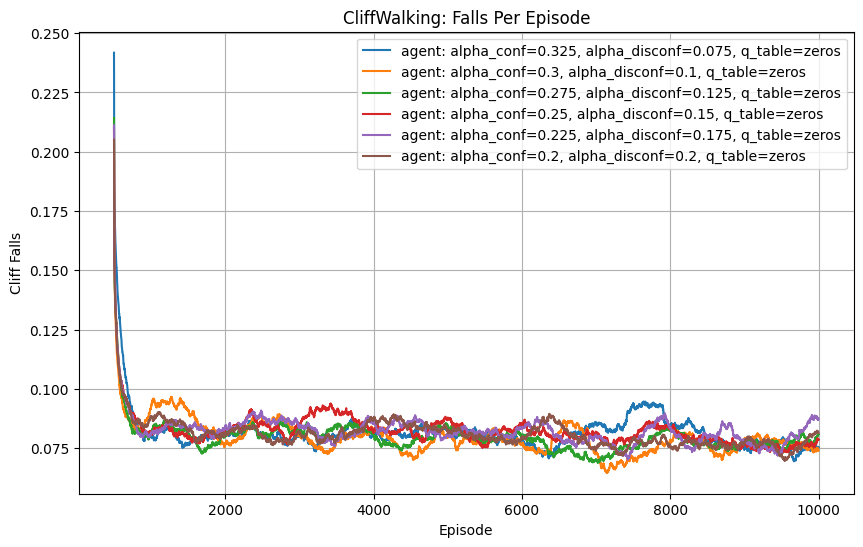

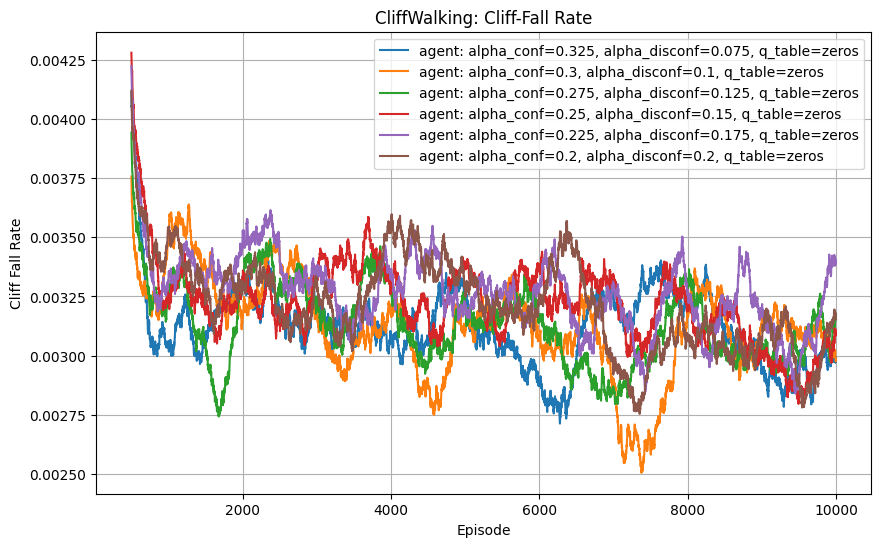

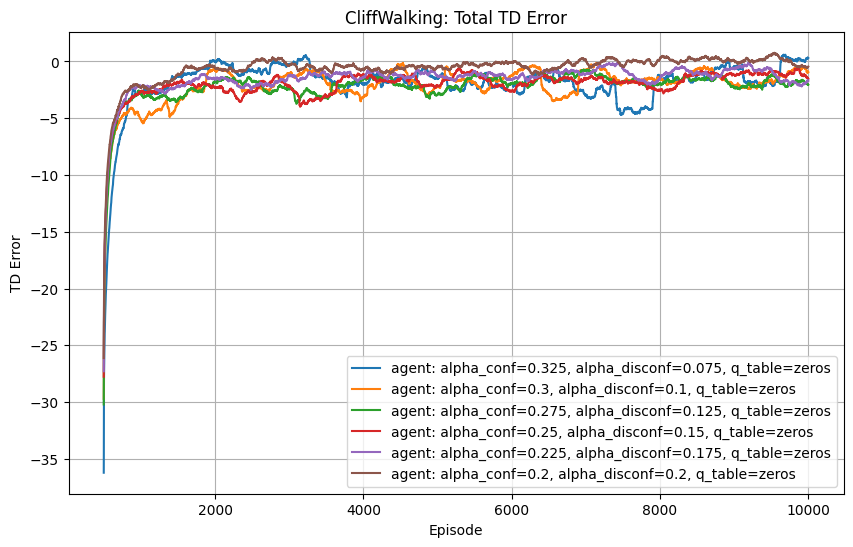

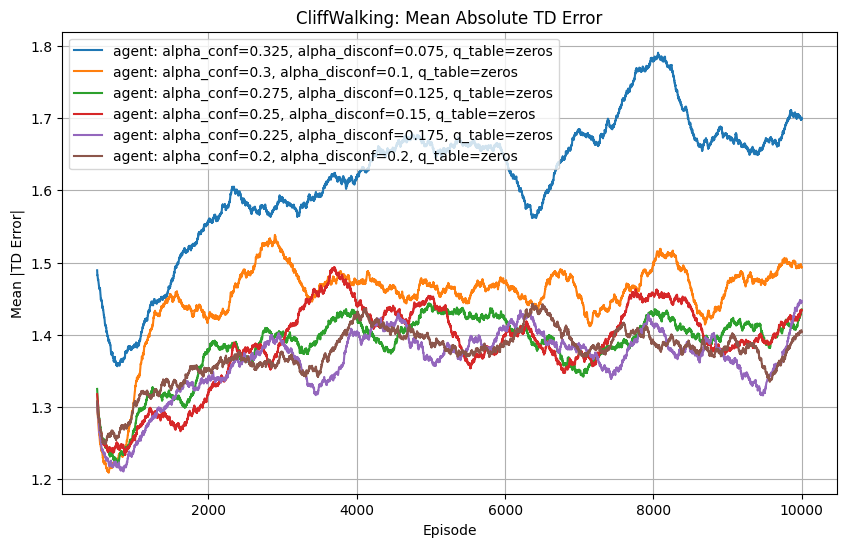

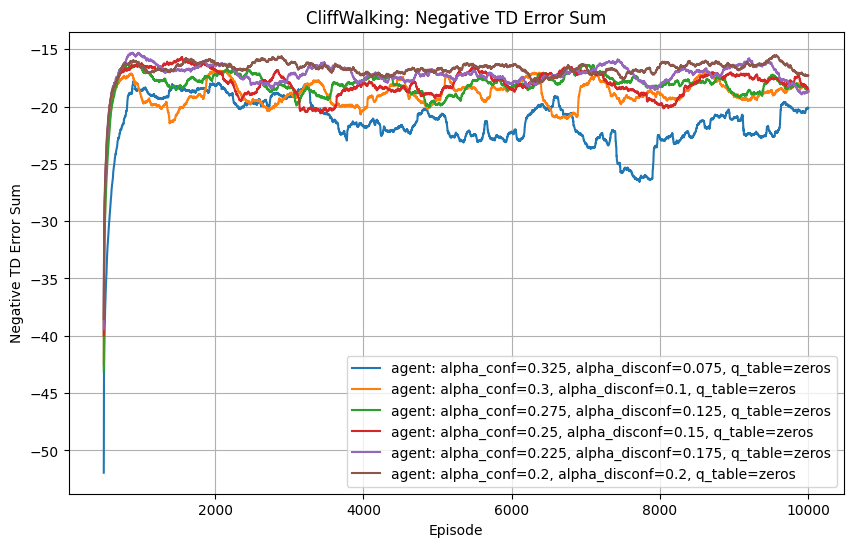

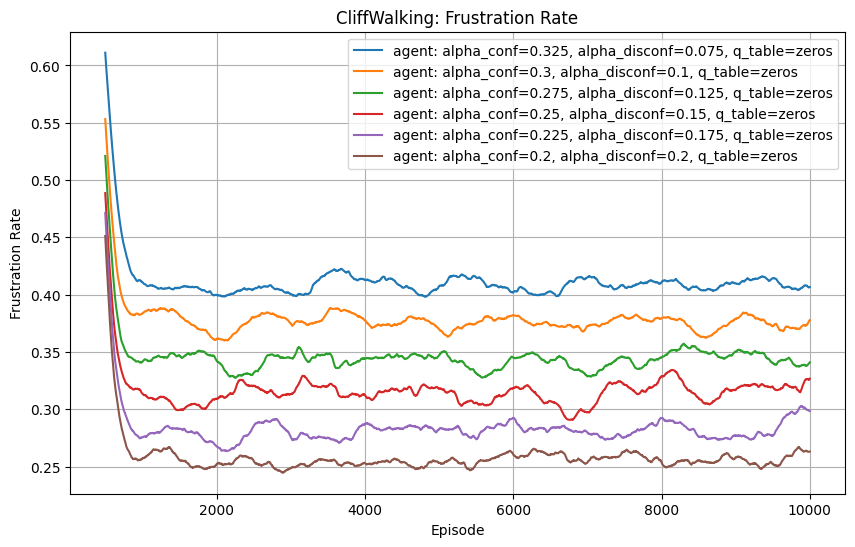

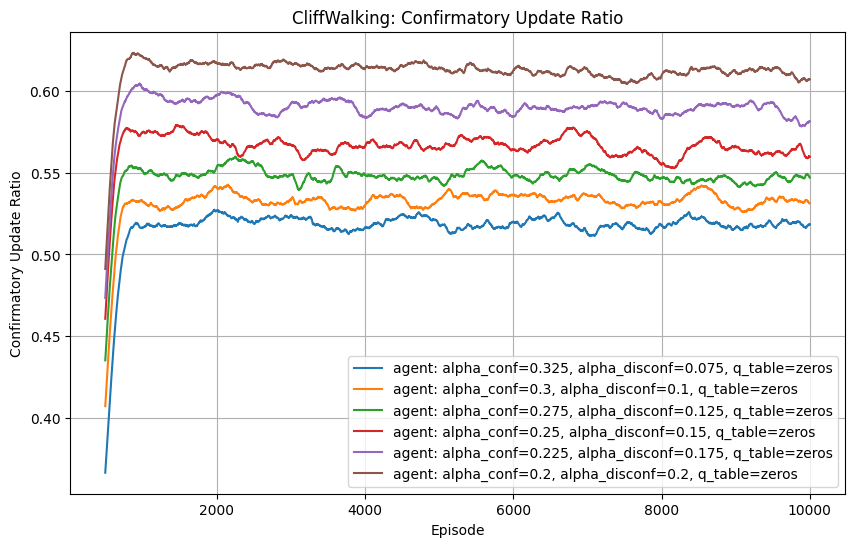

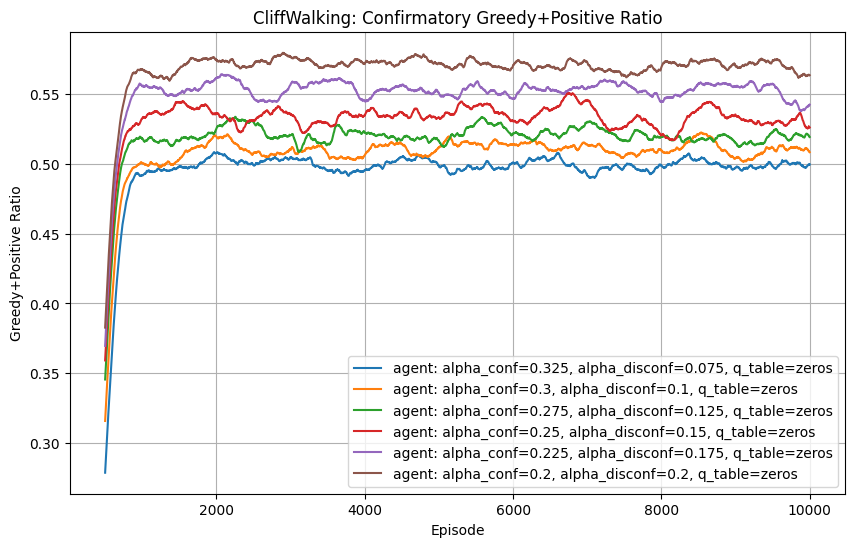

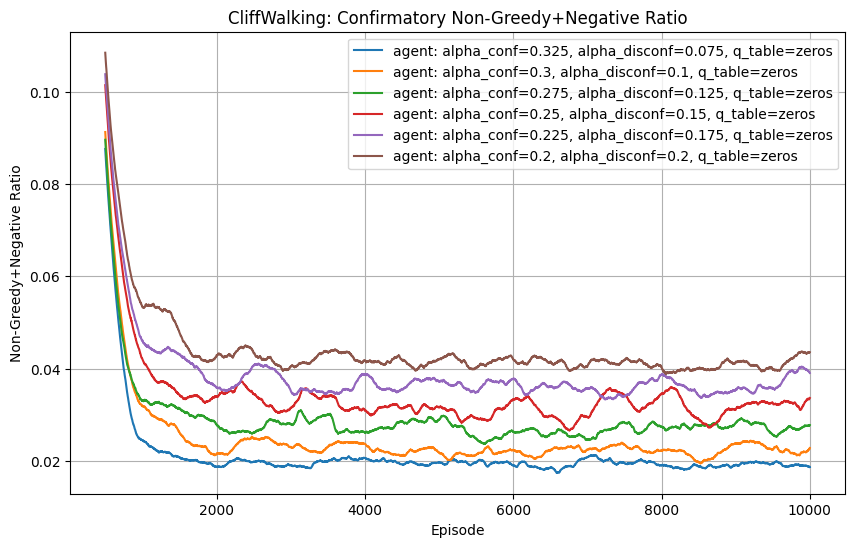

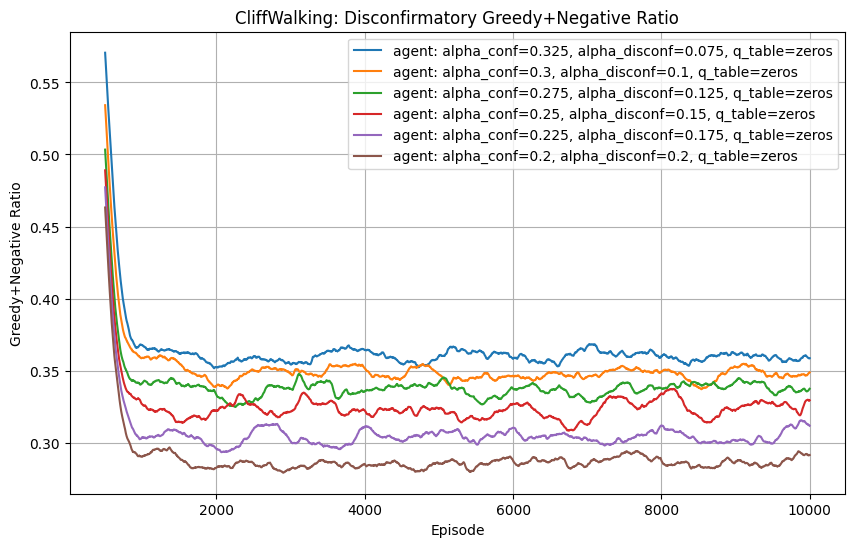

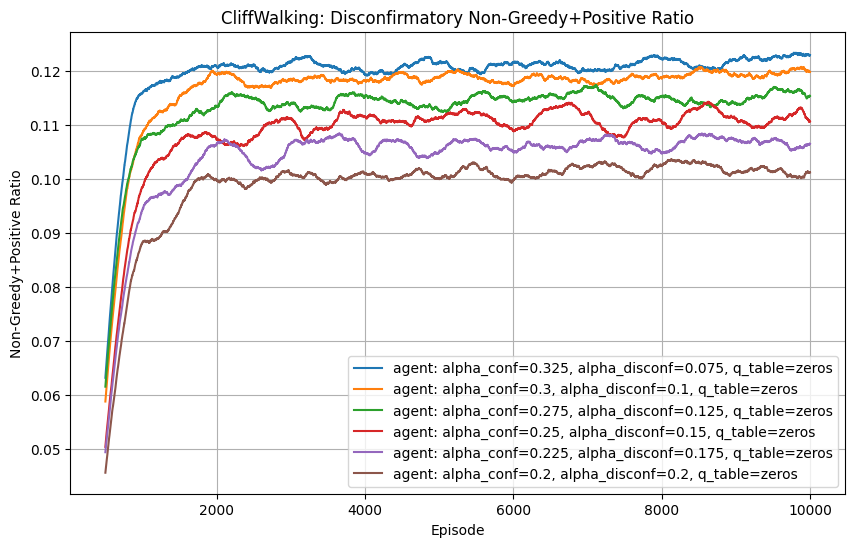

In [11]:
plot_sweep_training(
    conf_conf_results,
    window_size=500,
    start_episode=0,
    plot_specs=cliffwalking_training_plot_specs(),
    use_td_error_v=True
)

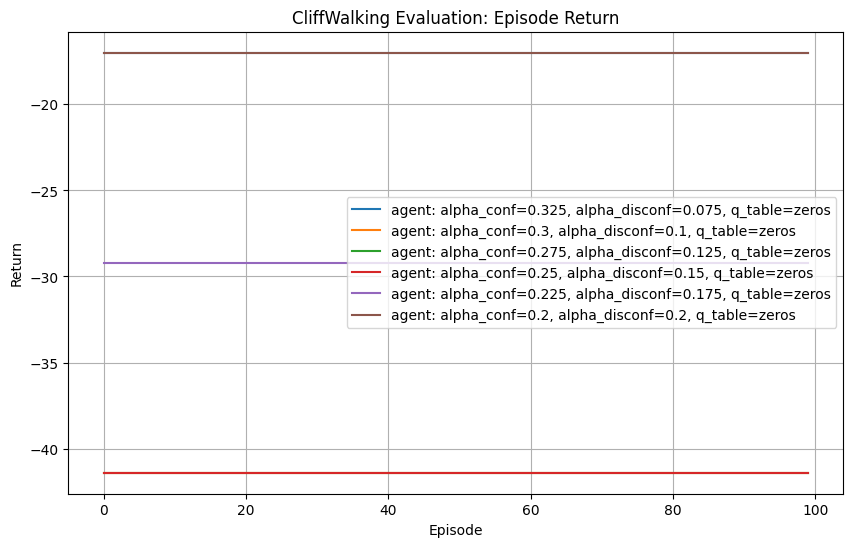

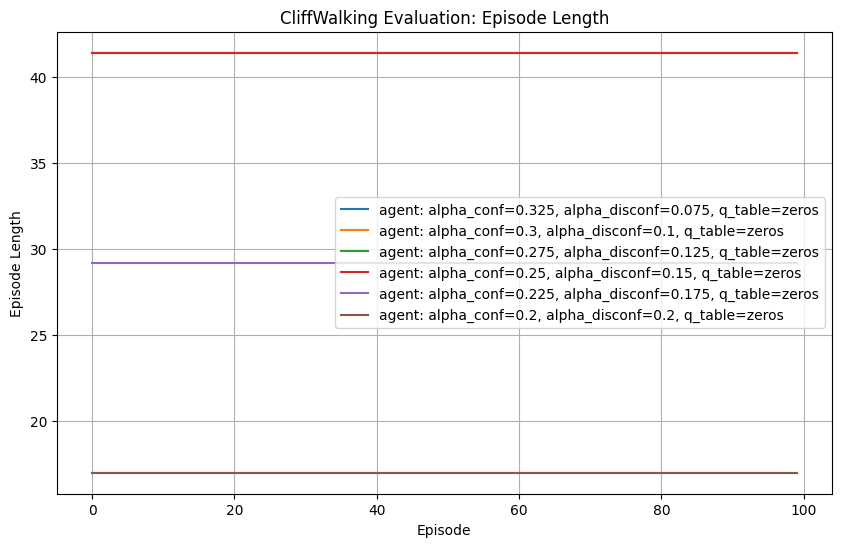

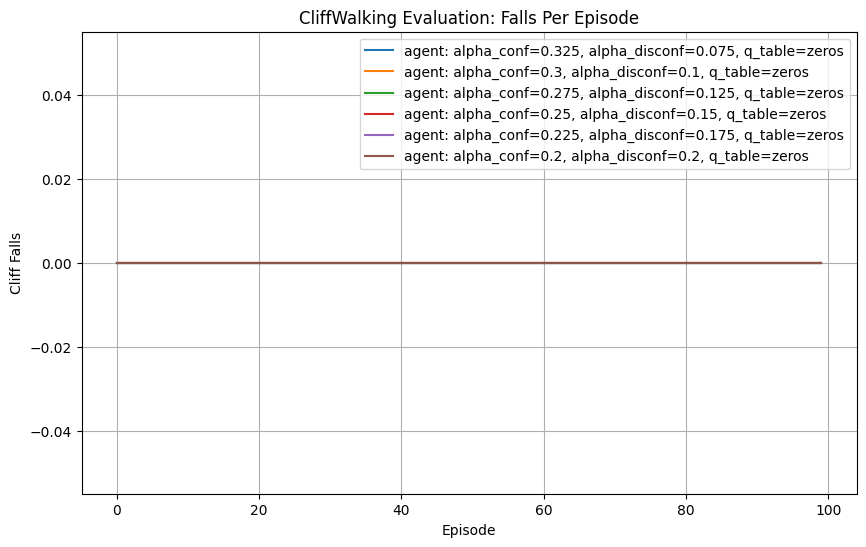

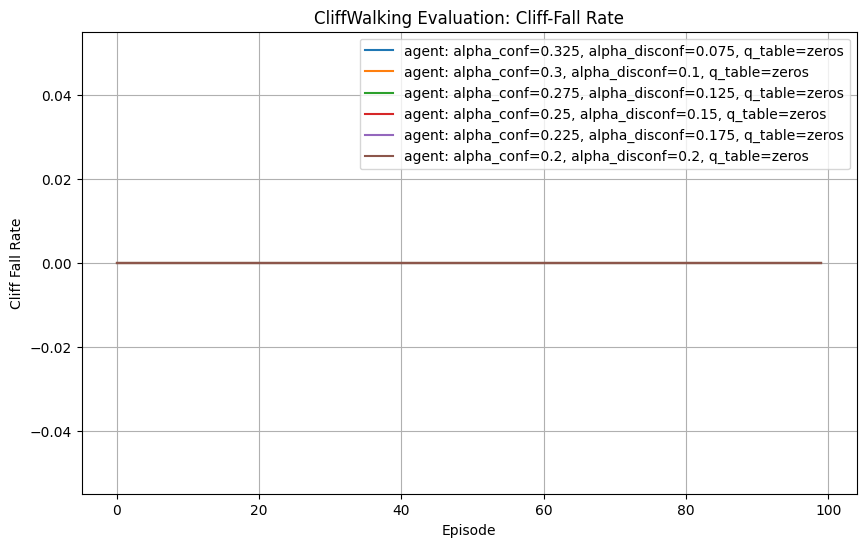

In [13]:
plot_sweep_evaluation(
    conf_conf_results,
    window_size=1,
    plot_specs=cliffwalking_evaluation_plot_specs(),
)

In [ ]:
# CliffWalking - positivity bias
file_cliffwalking_pos = RESULTS_PATH / "cliffwalking_final_results" / "cliffwalking_pos_all_ratios.pkl"
with file_cliffwalking_pos.open("rb") as f:
    pos_results = pickle.load(f)
print(f"Loaded {len(pos_results)} runs from {file_cliffwalking_pos}")

## Frozen Lake

In [6]:
# FrozenLake - confirmation bias
file_frozenlake_conf = Path("outputs/sweeps/frozenlake_final_results/frozenlake_conf_all_pairs.pkl")
with file_frozenlake_conf.open("rb") as f:
    conf_results = pickle.load(f)
print(f"Loaded {len(conf_results)} runs from {file_frozenlake_conf}")

Loaded 165 runs from outputs/sweeps/frozenlake_final_results/frozenlake_conf_all_pairs.pkl


In [7]:
plot_sweep_training(
    cliffwalking_evaluation_plot_specs,
    window_size=500,
    start_episode=0,
)

ValueError: plot_specs must be provided and non-empty

In [ ]:
# FrozenLake - positivity bias
file_frozenlake_pos = Path("outputs/sweeps/frozenlake_final_results/frozenlake_pos_all_ratios.pkl")
with file_frozenlake_pos.open("rb") as f:
    pos_results = pickle.load(f)
print(f"Loaded {len(pos_results)} runs from {file_frozenlake_pos}")